In [1]:
import sys
import os
import csv
import config
from collections import Counter 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing

# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

In [2]:
%matplotlib inline

PROJECT_PATH = config.data_directory

# load dataFrame
df = pd.read_csv('{}/{}.csv'.format(PROJECT_PATH, 'engSongs'))
df.head()

,id,name,popularity,duration_ms,explicit,artist,artist_id,album,album_id,album_release_date,...,lyrics,is_english,t_entities,subjectivity,polarity,positivity,neutrality,negativity,afinn_score,custom_afinn_score
0,57bgtoPSgt236HzfBOd8kj,Thunderstruck,80,292880,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Thunder [x10] I was caught In the middle of ...,True,"{(384, 'Beating'): 'GPE', (380, 'Thunderstruck...",0.399074,0.275926,0.232,0.664,0.104,22.0,10.0
1,5u5F7qLDvZjBSktaDp4HxB,Moneytalks,62,225946,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,"Tailored suits, chauffeured cars Fine hotels...",True,"{(390, 'the Moneytalk Come'): 'LAW', (381, 'Fr...",0.330324,0.042593,0.025,0.961,0.014,5.0,6.0
2,5pKJtX4wBeby9qIfFhyOJj,Don't Go Breaking My Heart,69,271133,0,Elton John,3PhoLpVuITZKcymswpck5b,To Be Continued...,7iKDBfOFUtg8E8RbuDhiux,1990-11-08,...,Don't go breaking my heart I couldn't if I t...,True,"{(383, 'Baby'): 'ORG'}",0.563757,0.154497,0.009,0.971,0.019,16.0,-1.0
3,7em38Hh2sKwnZ1HDgxvg82,Circle Of Life,47,290093,0,Elton John,3PhoLpVuITZKcymswpck5b,Love Songs,1bnoqPJyaxMCtYuSprcBTD,1995-11-06,...,"From the day we arrive on the planet And, bl...",True,"{(391, 'the day'): 'DATE', (384, 'Keeps'): 'GPE'}",0.538571,0.221006,0.125,0.846,0.029,14.0,4.0
4,6gZVQvQZOFpzIy3HblJ20F,Man in the Box,70,284426,1,Alice In Chains,64tNsm6TnZe2zpcMVMOoHL,Facelift,5LbHbwejgZXRZAgzVAjkhj,1990,...,I'm the man in the box [Album version:] Buri...,True,"{(380, 'Jesus Christ'): 'PERSON', (383, 'Music...",0.566667,0.058333,0.079,0.768,0.153,-3.0,-4.0


In [3]:
df["genres"].describe()

count                                                  1026
unique                                                  660
top       ['contemporary country', 'country', 'country r...
freq                                                     15
Name: genres, dtype: object

In [4]:
df['album_release_date'].describe()

count           1026
unique           587
top       2006-01-01
freq              16
Name: album_release_date, dtype: object

In [5]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'],infer_datetime_format=True)

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64']).copy()
df_num.describe()

,popularity,duration_ms,explicit,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,subjectivity,polarity,positivity,neutrality,negativity,afinn_score,custom_afinn_score
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,...,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,50.502924,238608.316764,0.201754,14.198830,0.572237,0.678065,5.330409,-7.249260,0.696881,0.093826,...,0.195001,0.504316,120.980173,0.507986,0.093823,0.139837,0.757366,0.102806,-0.028265,-1.654971
std,6.753679,62129.487039,0.401506,8.580149,0.158428,0.218748,3.571020,3.253567,0.459830,0.104107,...,0.157613,0.234163,29.522933,0.123122,0.176446,0.084092,0.094795,0.075216,41.030223,11.877417
min,38.000000,33226.000000,0.000000,1.000000,0.150000,0.053300,0.000000,-25.565000,0.000000,0.022800,...,0.022100,0.036900,52.365000,0.000000,-0.526025,0.000000,0.424000,0.000000,-306.000000,-62.000000
25%,45.000000,200312.750000,0.000000,11.000000,0.461250,0.536000,2.000000,-8.856250,0.000000,0.033700,...,0.096625,0.320000,96.658250,0.432340,-0.012359,0.078000,0.697000,0.045000,-11.000000,-7.000000
50%,49.000000,230135.500000,0.000000,13.000000,0.575000,0.713500,5.000000,-6.678000,1.000000,0.049700,...,0.129000,0.490500,119.803000,0.509040,0.088501,0.126000,0.763500,0.091000,3.000000,0.000000
75%,54.750000,267449.500000,0.000000,15.750000,0.684750,0.858000,9.000000,-5.006000,1.000000,0.097700,...,0.261750,0.682000,140.912500,0.583333,0.191902,0.180000,0.824000,0.142000,17.750000,5.000000
max,80.000000,550480.000000,1.000000,100.000000,0.980000,0.997000,11.000000,-0.320000,1.000000,0.883000,...,0.982000,0.971000,203.824000,1.000000,0.807407,0.520000,1.000000,0.504000,170.000000,38.000000


In [7]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

def standarize(num_df):
    # Get column names first
    names = num_df.columns

    # Fit data on the scaler object
    scaled = scaler.fit_transform(num_df)
    return pd.DataFrame(scaled, columns=names)

In [8]:
scaled_df = standarize(df_num)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


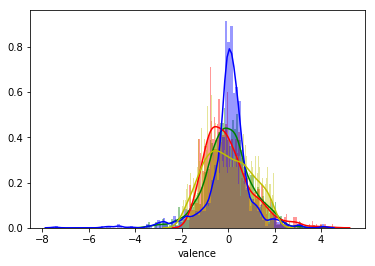

In [9]:
sns.distplot(scaled_df['polarity'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['positivity'], color='r', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['afinn_score'], color='b', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['valence'], color='y', bins=100, hist_kws={'alpha': 0.4});

In [10]:
def plotCorrelation(target_df):
    # Compute the correlation matrix
    corr = target_df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

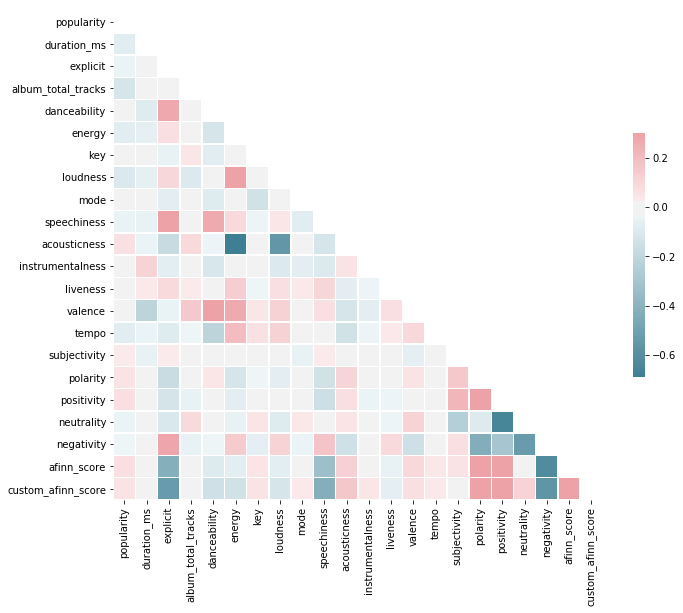

In [11]:
plotCorrelation(scaled_df)

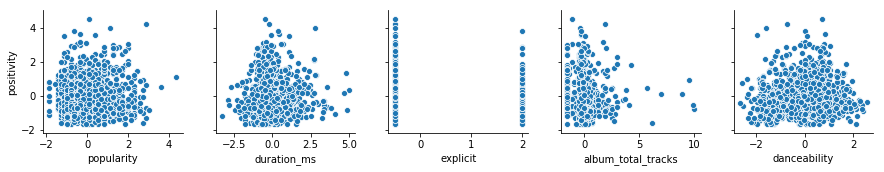

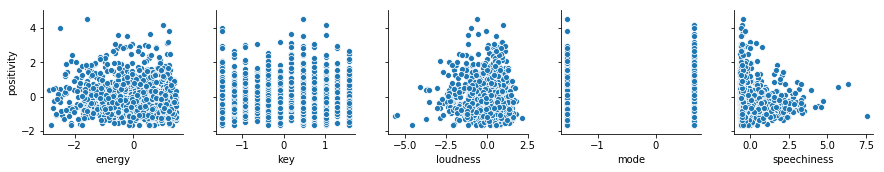

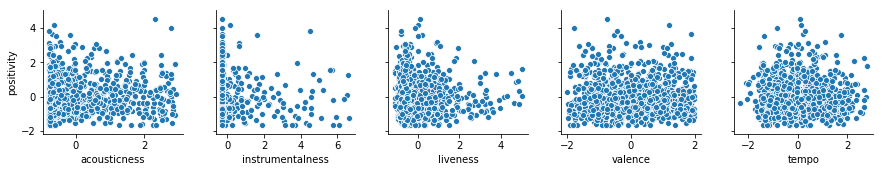

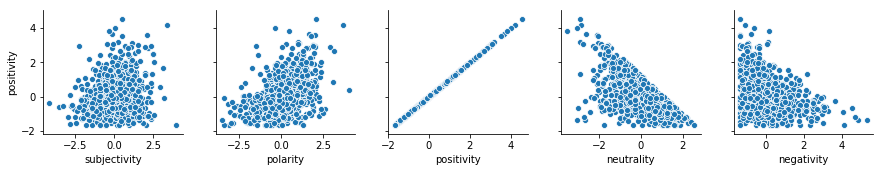

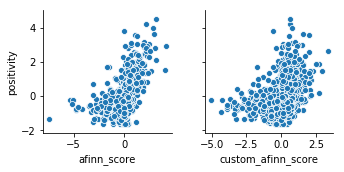

In [12]:
for i in range(0, len(scaled_df.columns), 5):
    sns.pairplot(data=scaled_df,
                x_vars=scaled_df.columns[i:i+5],
                y_vars=['positivity'])

In [13]:
df_num_date = df.select_dtypes(include = ['datetime64', 'float64', 'int64']).copy()

names = scaled_df.columns
df_num_date[names] = scaled_df

In [14]:
def genresStandarize(target_df):
    for index, row in df.iterrows():
        array = eval(df.loc[index, 'genres'])
        # Iterate and create new columns, with the 0 and 1 encoding
        for r in array:
            target_df["%s" % r] = df["genres"].apply(
                lambda l: 1 if r in l else 0)

In [15]:
genresStandarize(df_num_date)
df_num_date.head()

,popularity,duration_ms,explicit,album_release_date,album_total_tracks,danceability,energy,key,loudness,mode,...,austindie,teen pop,show tunes,indonesian jazz,deep talent show,bedroom soul,nc hip hop,pop folk,stomp and flutter,australian electropop
0,4.369686,0.873951,-0.502740,1990-09-24,-0.256394,-0.449866,0.964756,-0.372739,0.637845,0.659519,...,0,0,0,0,0,0,0,0,0,0
1,1.703173,-0.203905,-0.502740,1990-09-24,-0.256394,0.491081,1.028788,0.467767,1.098487,0.659519,...,0,0,0,0,0,0,0,0,0,0
2,2.740150,0.523754,-0.502740,1990-11-08,6.156876,1.078383,0.822971,-0.092570,-0.166280,0.659519,...,0,0,0,0,0,0,0,0,0,0
3,-0.518922,0.829072,-0.502740,1995-11-06,0.093420,-1.870760,-0.325028,1.308273,-0.258224,0.659519,...,0,0,0,0,0,0,0,0,0,0
4,2.888290,0.737814,1.989101,1990-01-01,-0.256394,-1.428704,0.397617,0.747935,-0.402444,0.659519,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_num_date['afinn_score'].describe()

count    1.026000e+03
mean     2.748505e-17
std      1.000488e+00
min     -7.460865e+00
25%     -2.675366e-01
50%      7.384171e-02
75%      4.335081e-01
max      4.145997e+00
Name: afinn_score, dtype: float64

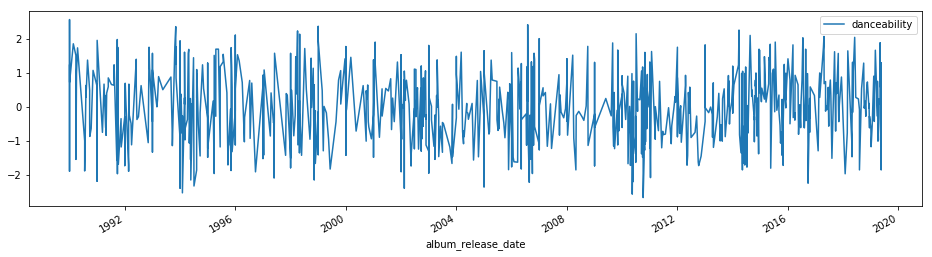

In [17]:
dance = pd.Series(data=df_num_date['danceability'].values, index=df_num_date['album_release_date'])
dance.plot(figsize=(16,4), label="danceability", legend=True)

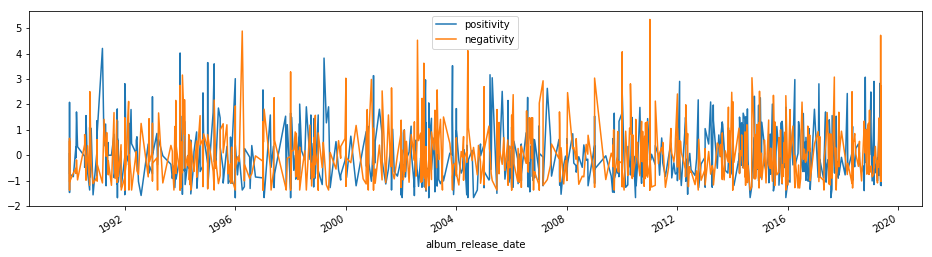

In [18]:
p = pd.Series(data=df_num_date['positivity'].values, index=df_num_date['album_release_date'])
p.plot(figsize=(16,4), label="positivity", legend=True)
n = pd.Series(data=df_num_date['negativity'].values, index=df_num_date['album_release_date'])
n.plot(figsize=(16,4), label="negativity", legend=True)

In [19]:
df_num_date['rock'].describe()

count    1026.000000
mean        0.495127
std         0.500220
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: rock, dtype: float64

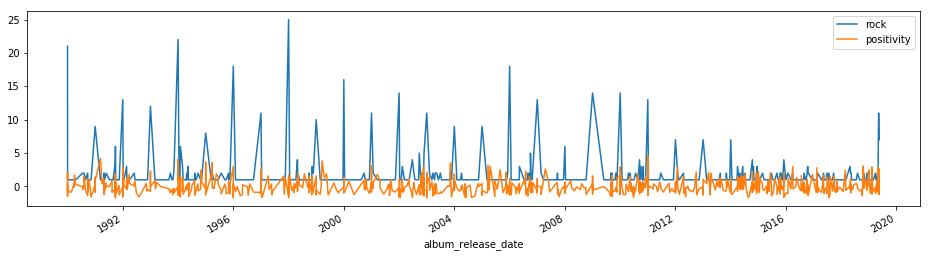

In [20]:
dcn = df_num_date.groupby(['album_release_date'])['rock'].count()
dcn.plot(figsize=(16,4), label="rock", legend=True)
p = pd.Series(data=df_num_date['positivity'].values, index=df_num_date['album_release_date'])
p.plot(figsize=(16,4), label="positivity", legend=True)

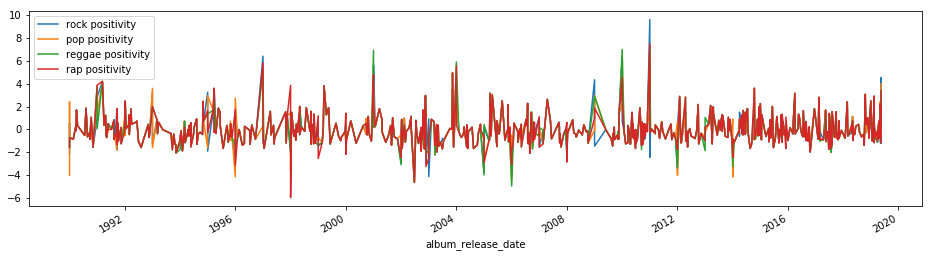

In [21]:
dfrock = df_num_date.groupby(['album_release_date', 'rock'])['positivity'].sum().reset_index(name='positivity')
rock = pd.Series(data=dfrock['positivity'].values, index=dfrock['album_release_date'])
rock.plot(figsize=(16,4), label="rock positivity", legend=True)
dfpop = df_num_date.groupby(['album_release_date', 'pop'])['positivity'].sum().reset_index(name='positivity')
pop = pd.Series(data=dfpop['positivity'].values, index=dfpop['album_release_date'])
pop.plot(figsize=(16,4), label="pop positivity", legend=True)
dfreggae = df_num_date.groupby(['album_release_date', 'reggae'])['positivity'].sum().reset_index(name='positivity')
reggae = pd.Series(data=dfreggae['positivity'].values, index=dfreggae['album_release_date'])
reggae.plot(figsize=(16,4), label="reggae positivity", legend=True)
dfrap = df_num_date.groupby(['album_release_date', 'rap'])['positivity'].sum().reset_index(name='positivity')
rap = pd.Series(data=dfrap['positivity'].values, index=dfrap['album_release_date'])
rap.plot(figsize=(16,4), label="rap positivity", legend=True)

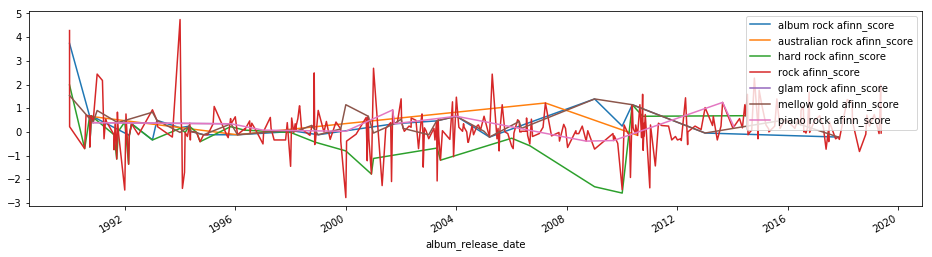

In [22]:
for i in range(23, len(df_num_date.columns) - 454, 1):
    dfrock = df_num_date[df_num_date.iloc[:,i] == 1].groupby(['album_release_date'])['afinn_score'].sum().reset_index(name='afinn_score')
    rap = pd.Series(data=dfrock['afinn_score'].values, index=dfrock['album_release_date'])
    rap.plot(figsize=(16,4), label=df_num_date.iloc[:,i].name + " afinn_score", legend=True)

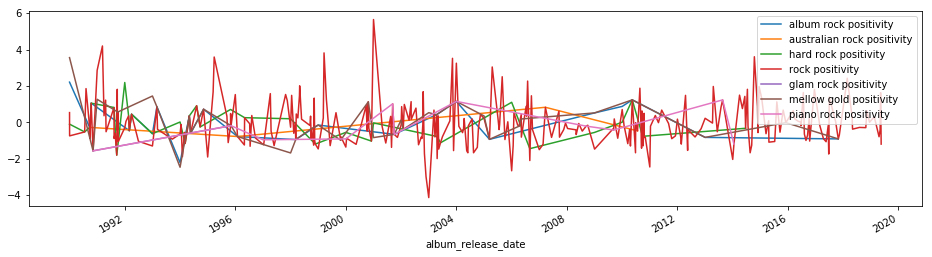

In [23]:
for i in range(23, len(df_num_date.columns) - 454, 1):
    dfrock = df_num_date[df_num_date.iloc[:,i] == 1].groupby(['album_release_date'])['positivity'].sum().reset_index(name='positivity')
    rap = pd.Series(data=dfrock['positivity'].values, index=dfrock['album_release_date'])
    rap.plot(figsize=(16,4), label=df_num_date.iloc[:,i].name + " positivity", legend=True)

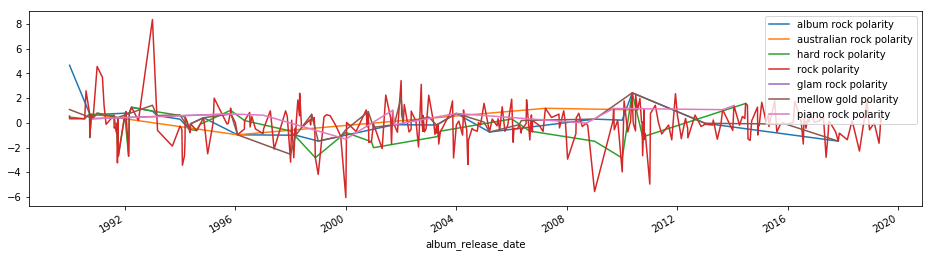

In [24]:
for i in range(23, len(df_num_date.columns) - 454, 1):
    dfrock = df_num_date[df_num_date.iloc[:,i] == 1].groupby(['album_release_date'])['polarity'].sum().reset_index(name='polarity')
    rap = pd.Series(data=dfrock['polarity'].values, index=dfrock['album_release_date'])
    rap.plot(figsize=(16,4), label=df_num_date.iloc[:,i].name + " polarity", legend=True)

In [25]:
def plotWordCloud(terget_df, target_column):
    wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100,colormap="Paired", background_color='black',)
    wordcloud.generate(str(terget_df[target_column]))
    # declare our figure 
    plt.figure(figsize=(20,10))
    plt.title("Top words - " + target_column, fontsize=20,color='black')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=10)
    plt.show()

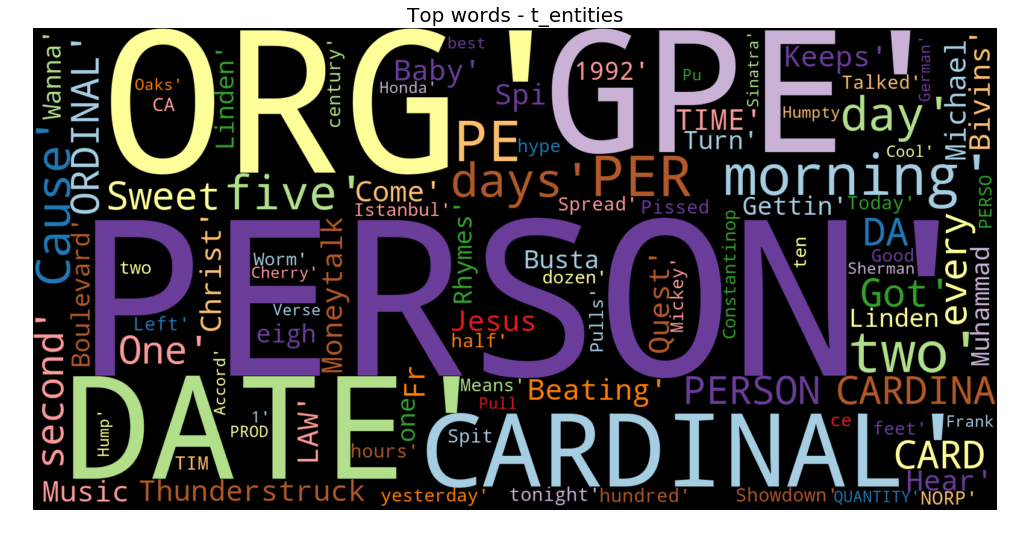

In [26]:
plotWordCloud(df, 't_entities')

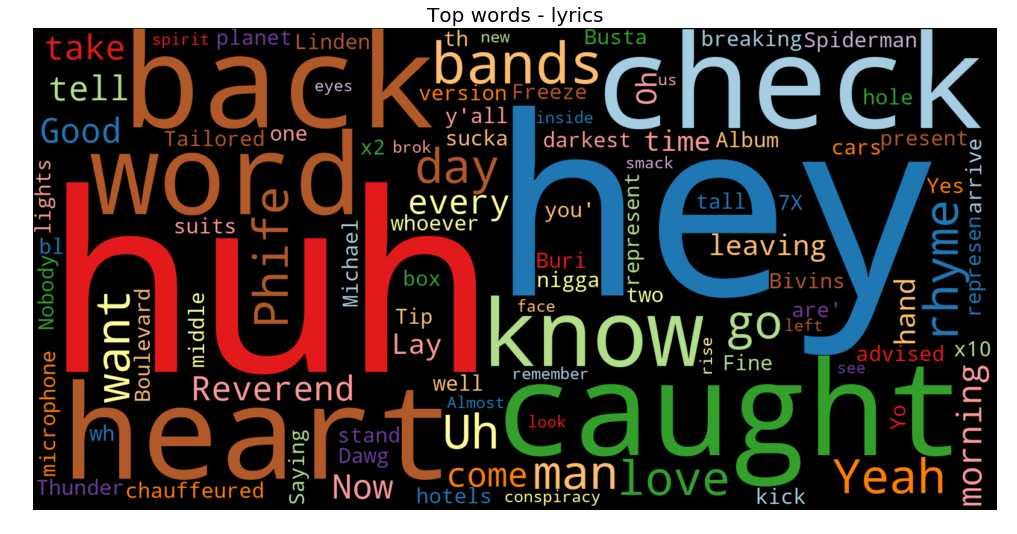

In [27]:
plotWordCloud(df, 'lyrics')

In [28]:
df_sent = df[['polarity', 'afinn_score', 'custom_afinn_score']].copy()
df_sent['positivity'] = df.apply(lambda x: (x['positivity'] - x['negativity']), axis=1)
df_sent.describe()

,polarity,afinn_score,custom_afinn_score,positivity
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,0.093823,-0.028265,-1.654971,0.037031
std,0.176446,41.030223,11.877417,0.128342
min,-0.526025,-306.000000,-62.000000,-0.477000
25%,-0.012359,-11.000000,-7.000000,-0.042000
50%,0.088501,3.000000,0.000000,0.031000
75%,0.191902,17.750000,5.000000,0.110750
max,0.807407,170.000000,38.000000,0.520000


In [29]:
df_sent_norm = standarize(df_sent)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


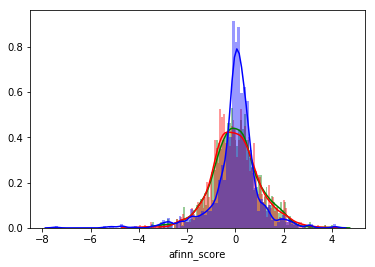

In [30]:
sns.distplot(df_sent_norm['polarity'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(df_sent_norm['positivity'], color='r', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(df_sent_norm['afinn_score'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [31]:
df_sent_date = df.select_dtypes(include = ['datetime64', 'float64', 'int64']).copy()

names = df_sent_norm.columns
df_sent_date[names] = df_sent_norm

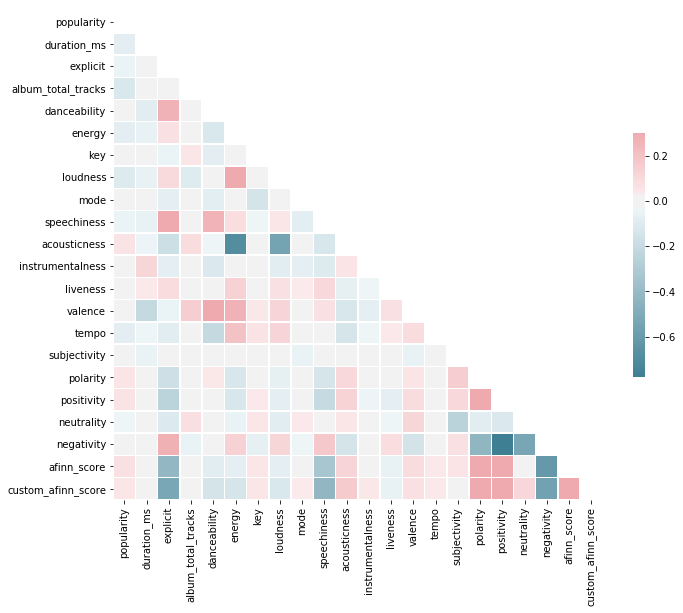

In [32]:
plotCorrelation(df_sent_date)

In [33]:
genresStandarize(df_sent_date)

In [52]:
def plotGenreDateSerie(target_df, genre, init = 23, limit = 454):
    for i in range(init, len(target_df.columns) - limit, 1):
        base = target_df[target_df.iloc[:,i] == 1].groupby(['album_release_date'])[genre].sum().reset_index(name=genre)
        plt = pd.Series(data=base[genre].values, index=base['album_release_date'])
        plt.plot(figsize=(16,4), label=target_df.iloc[:,i].name + " " + genre, legend=True)

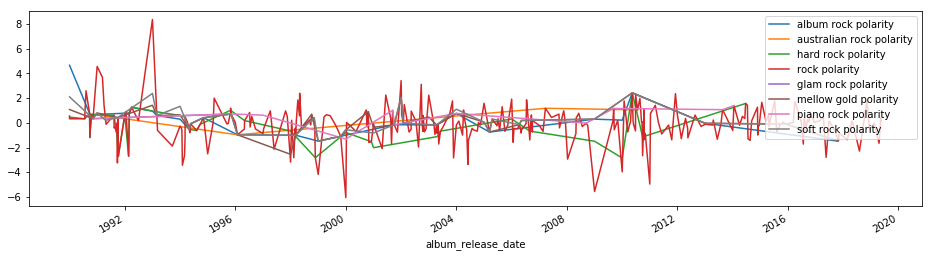

In [53]:
plotGenreDateSerie(df_sent_date, 'polarity')

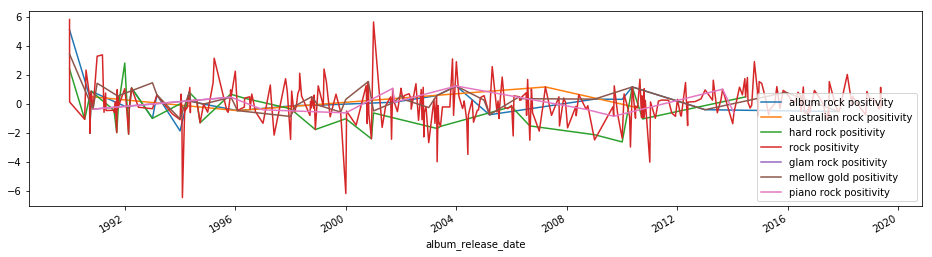

In [36]:
plotGenreDateSerie(df_sent_date, 'positivity')

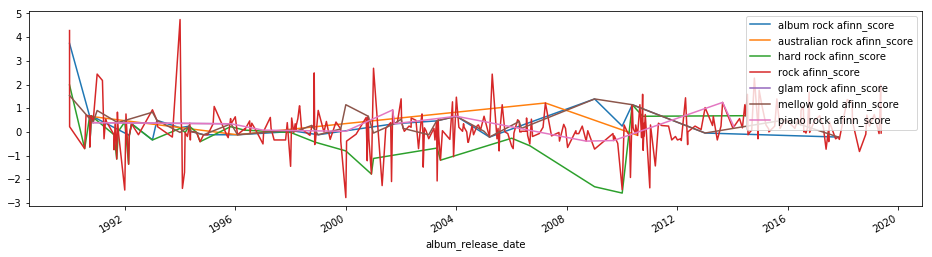

In [37]:
plotGenreDateSerie(df_sent_date, 'afinn_score')

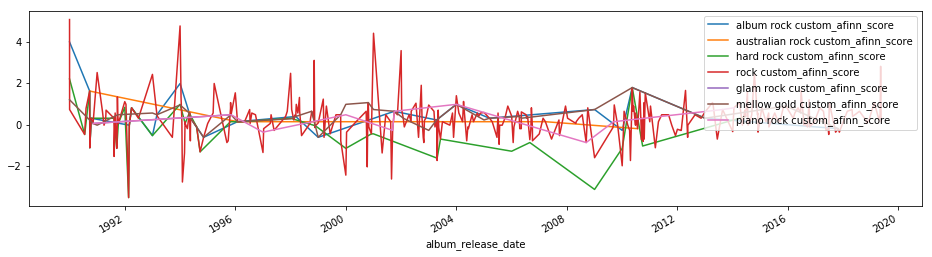

In [38]:
plotGenreDateSerie(df_sent_date, 'custom_afinn_score')

In [39]:
df_sent_date['lyrics'] = df.apply(lambda x: x['lyrics'], axis=1)

In [40]:
def plotWordCloudGenre(target_df, genre, target_column = 'lyrics'):
    genre_lyric_df = target_df[target_df[genre] == 1].copy()
    plotWordCloud(genre_lyric_df, target_column)

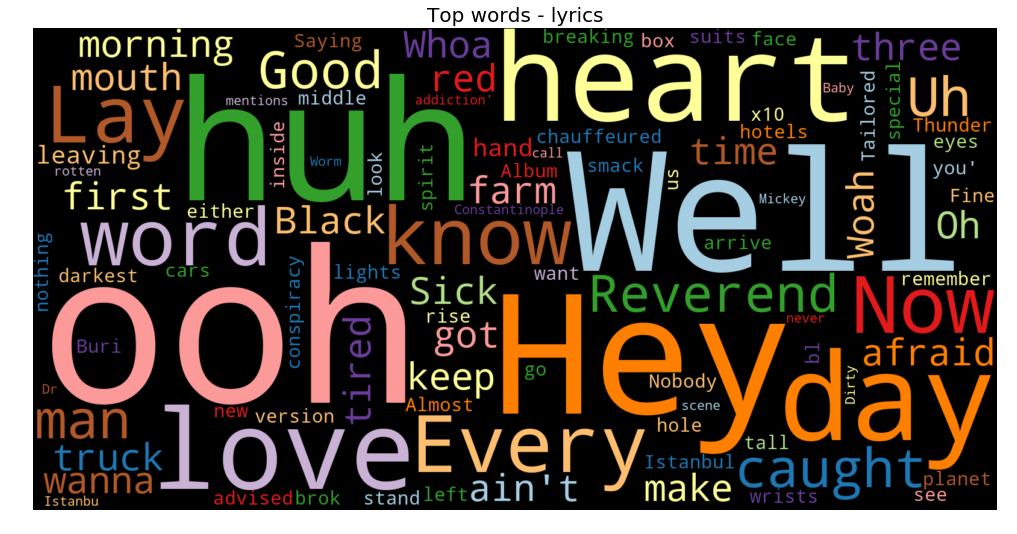

In [41]:
plotWordCloudGenre(df_sent_date, 'rock')

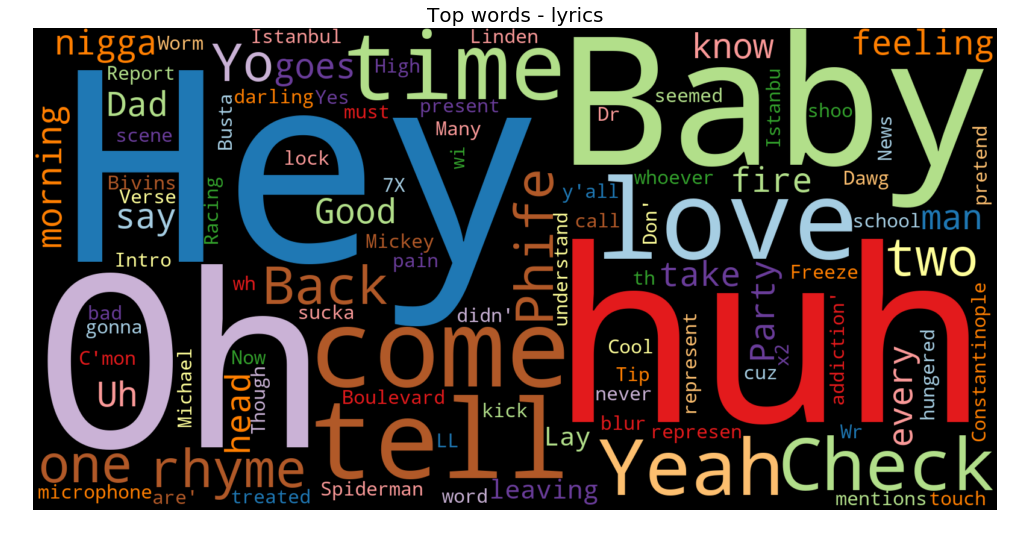

In [42]:
plotWordCloudGenre(df_sent_date, 'pop')

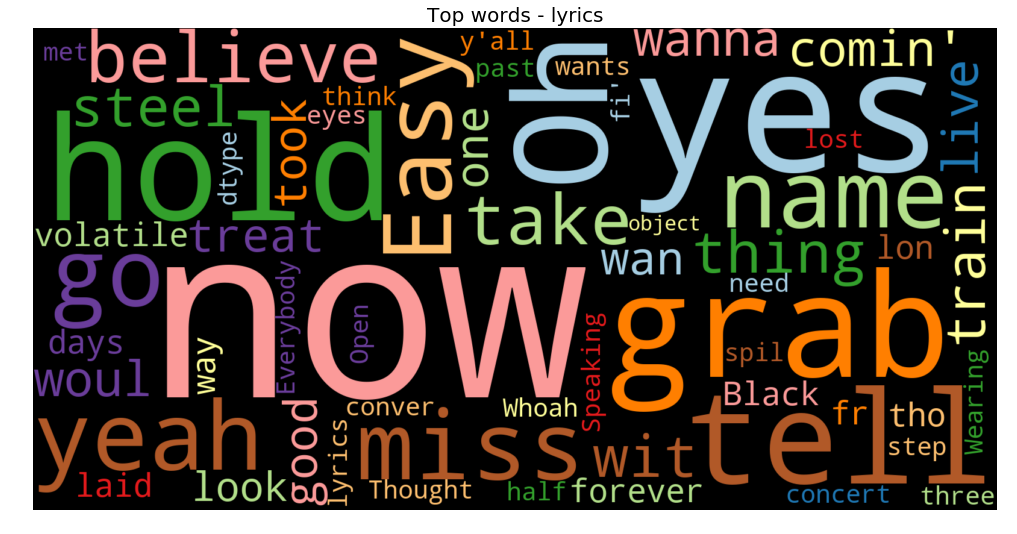

In [43]:
plotWordCloudGenre(df_sent_date, 'reggae')

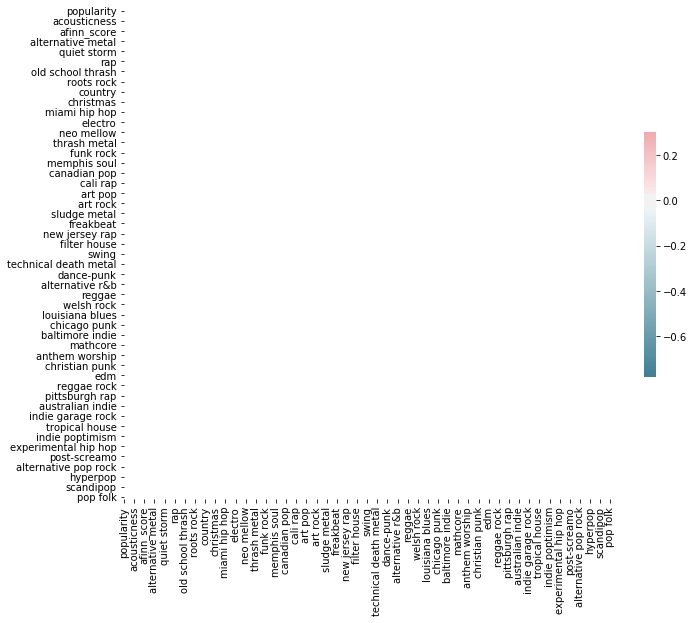

In [44]:
plotCorrelation(df_sent_date)

In [68]:
def scatplot(target_df, columns = None):
    if columns:
        scat = target_df[columns].copy()
    else:
        scat = target_df.copy()
    plotCorrelation(scat)

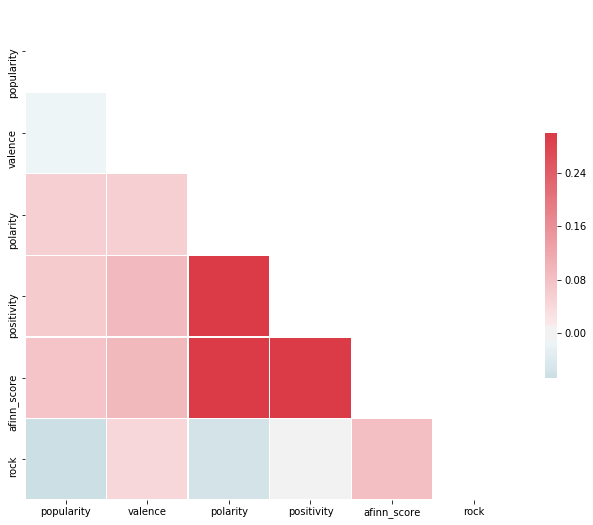

In [69]:
scatplot(df_sent_date , ['popularity', 'valence', 'polarity', 'positivity', 'afinn_score', 'rock'])

In [76]:
genres_sum = {}

for i in range(23, len(df_num_date.columns), 1):
    s = df_sent_date.iloc[:,i].sum()
    genres_sum[df_num_date.iloc[:,i].name] = s

max(zip(genres_sum.values(), genres_sum.keys()))

(576, 'pop')

In [77]:
genres_sort = sorted(genres_sum.items(), key=lambda x: x[1], reverse=True)
genres_sort

[('pop', 576),
 ('rock', 508),
 ('rap', 254),
 ('hip hop', 173),
 ('metal', 166),
 ('grunge', 153),
 ('post-grunge', 151),
 ('dance pop', 136),
 ('alternative rock', 135),
 ('pop rap', 133),
 ('alternative metal', 129),
 ('modern rock', 125),
 ('pop rock', 122),
 ('folk', 121),
 ('country', 119),
 ('r&b', 114),
 ('punk', 113),
 ('nu metal', 107),
 ('folk-pop', 86),
 ('contemporary country', 85),
 ('southern hip hop', 77),
 ('pop punk', 75),
 ('urban contemporary', 74),
 ('soul', 72),
 ('indie pop', 71),
 ('gangster rap', 70),
 ('permanent wave', 69),
 ('indie rock', 68),
 ('country road', 65),
 ('neo mellow', 65),
 ('country rock', 62),
 ('funk', 61),
 ('hip pop', 55),
 ('post-teen pop', 55),
 ('teen pop', 55),
 ('rap rock', 54),
 ('hard rock', 53),
 ('trap music', 52),
 ('neo soul', 50),
 ('indie folk', 49),
 ('garage rock', 44),
 ('electro', 43),
 ('groove metal', 41),
 ('soft rock', 40),
 ('hardcore hip hop', 40),
 ('mellow gold', 39),
 ('stomp and holler', 39),
 ('rap metal', 37),


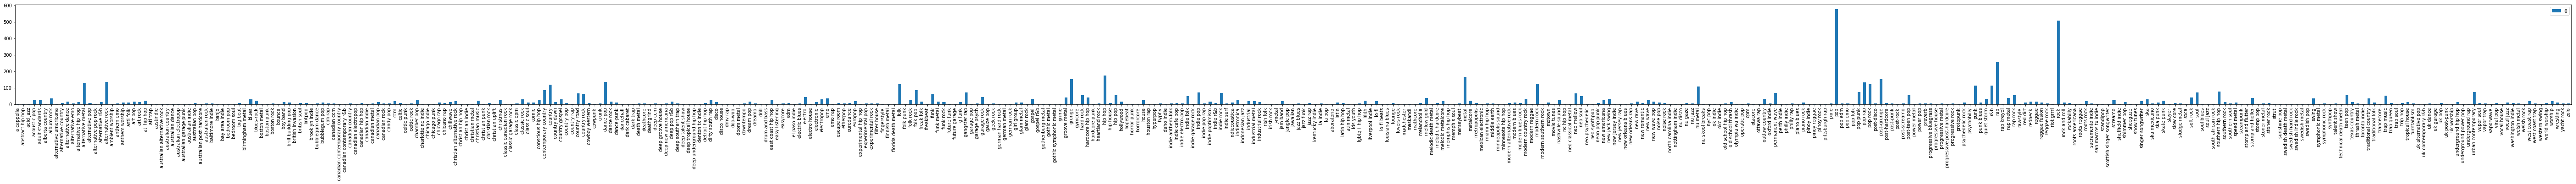

In [49]:
base = pd.DataFrame([genres_sum]).T
base.plot.bar(figsize=(100,4))

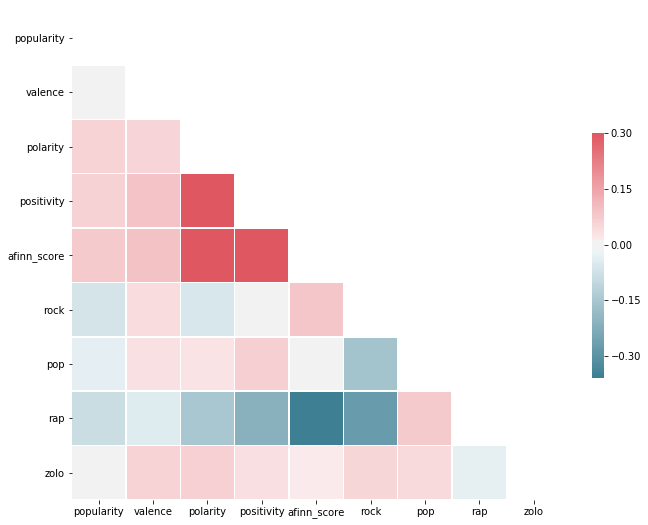

In [50]:
scatplot(df_sent_date ,['popularity', 'valence', 'polarity', 'positivity', 'afinn_score', 'rock', 'pop', 'rap', 'zolo'])

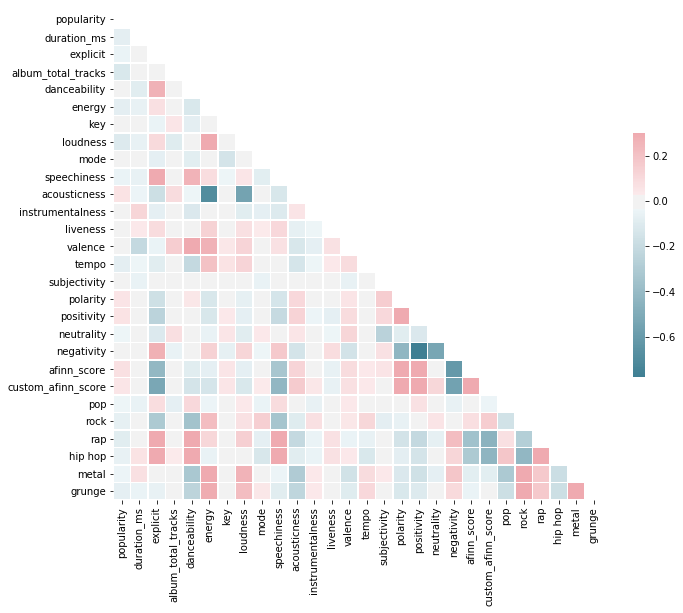

In [79]:
sub_df = df_sent_date.iloc[:,0:23].copy()
count = 0

for key, value in genres_sort:
    sub_df[key] = df_sent_date.apply(lambda x: x[key], axis=1)
    count += 1
    if count > 5:
        break

scatplot(sub_df)

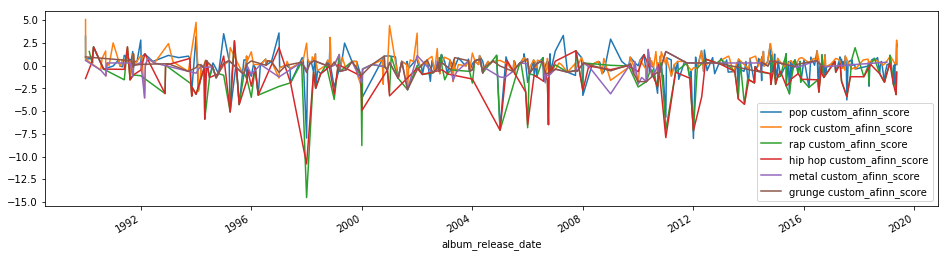

In [81]:
plotGenreDateSerie(sub_df, 'custom_afinn_score',init = 23, limit = 0)